In [1]:
library(dtw)

Loading required package: proxy

Attaching package: ‘proxy’

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix

Loaded dtw v1.20-1. See ?dtw for help, citation("dtw") for use in publication.



In [2]:
reference = as.vector(read.table('norm_sl.txt')$V1)
query = as.vector(read.table('norm_rl.txt')$V1)

In [4]:
alignment<-dtw(query,reference,keep=TRUE);

In [5]:
alignmentOBE <-
   dtw(query,reference,
       keep=TRUE,step=asymmetric,
       open.end=TRUE,open.begin=TRUE);

In [10]:
write.table(data.frame(alignmentOBE$index2),'cds_obe.txt', sep = '\t')

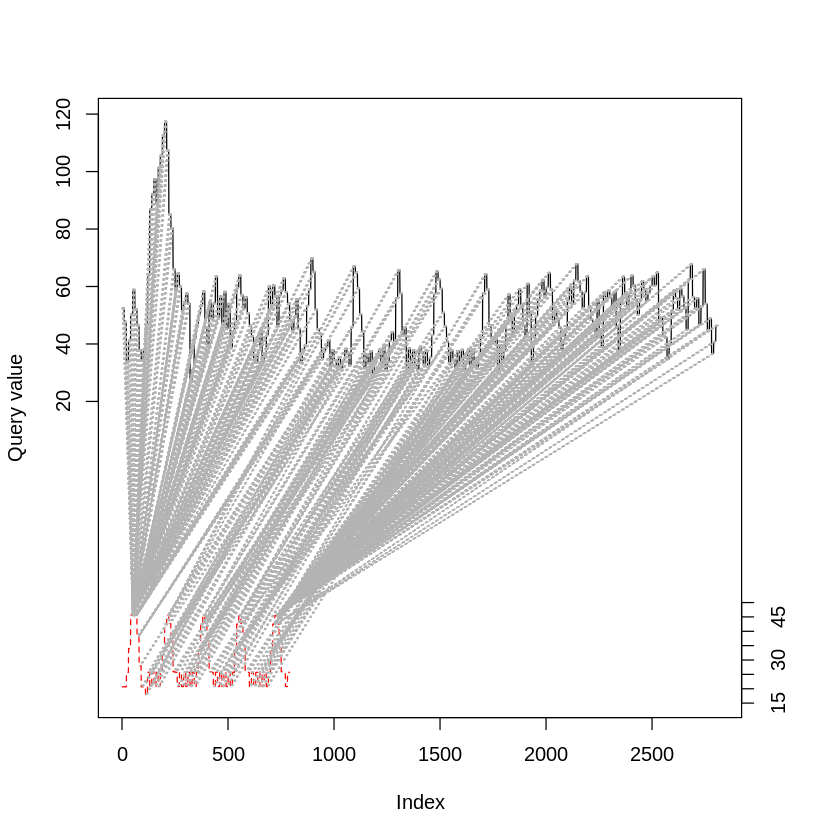

In [105]:
plot(alignmentOBE,type="two",off=-100);

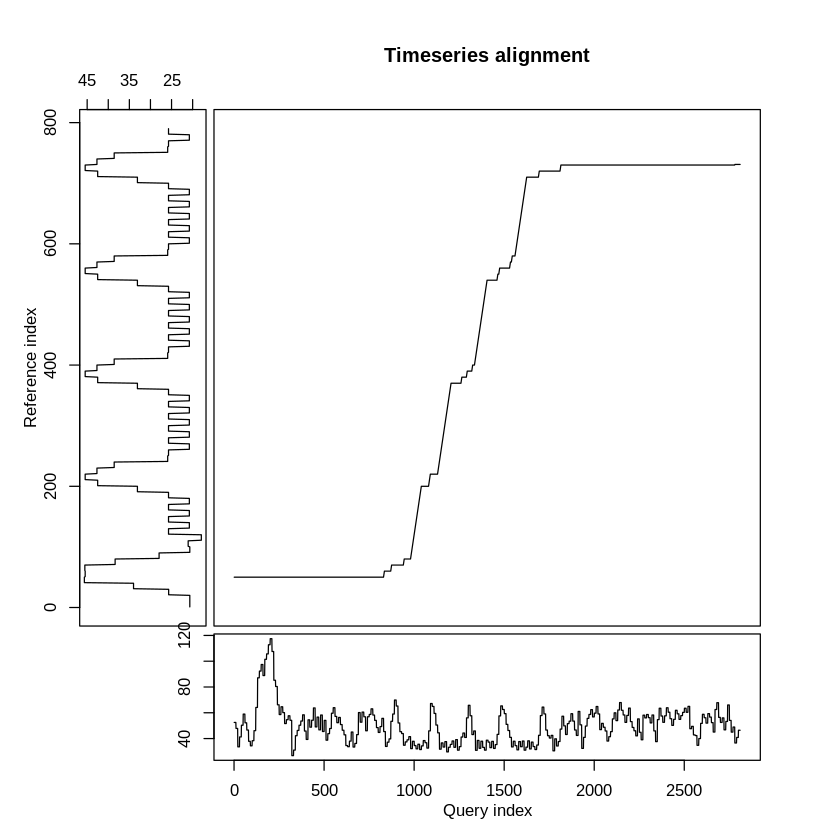

In [94]:
plot(alignmentOBE,type="threeway")

In [134]:
length(unique(alignmentOBE$index2))

[1] 342

In [126]:
alignmentOBE$N

[1] 2810


dtw> ## A noisy sine wave as query
dtw> idx<-seq(0,6.28,len=100);

dtw> query<-sin(idx)+runif(100)/10;

dtw> ## A cosine is for reference; sin and cos are offset by 25 samples
dtw> reference<-cos(idx)

dtw> plot(reference); lines(query,col="blue");

dtw> ## Find the best match
dtw> alignment<-dtw(query,reference);

dtw> ## Display the mapping, AKA warping function - may be multiple-valued
dtw> ## Equivalent to: plot(alignment,type="alignment")
dtw> plot(alignment$index1,alignment$index2,main="Warping function");


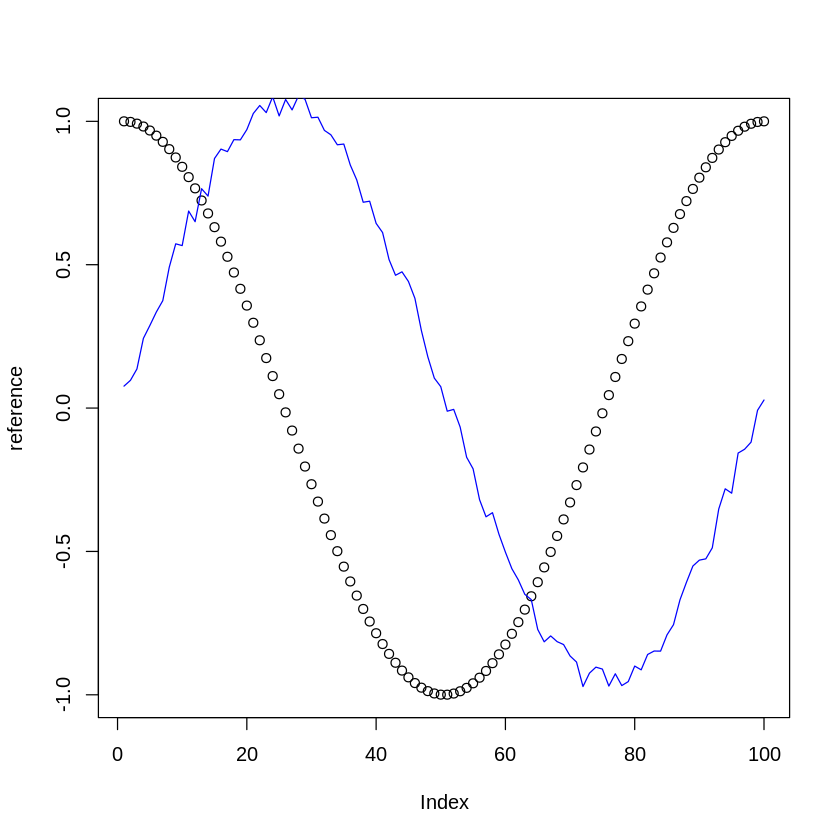


dtw> ## Confirm: 25 samples off-diagonal alignment
dtw> lines(1:100-25,col="red")

dtw> #########
dtw> ##
dtw> ## Partial alignments are allowed.
dtw> ##
dtw> 
dtw> alignmentOBE <-
dtw+   dtw(query[44:88],reference,
dtw+       keep=TRUE,step=asymmetric,
dtw+       open.end=TRUE,open.begin=TRUE);

dtw> plot(alignmentOBE,type="two",off=1);


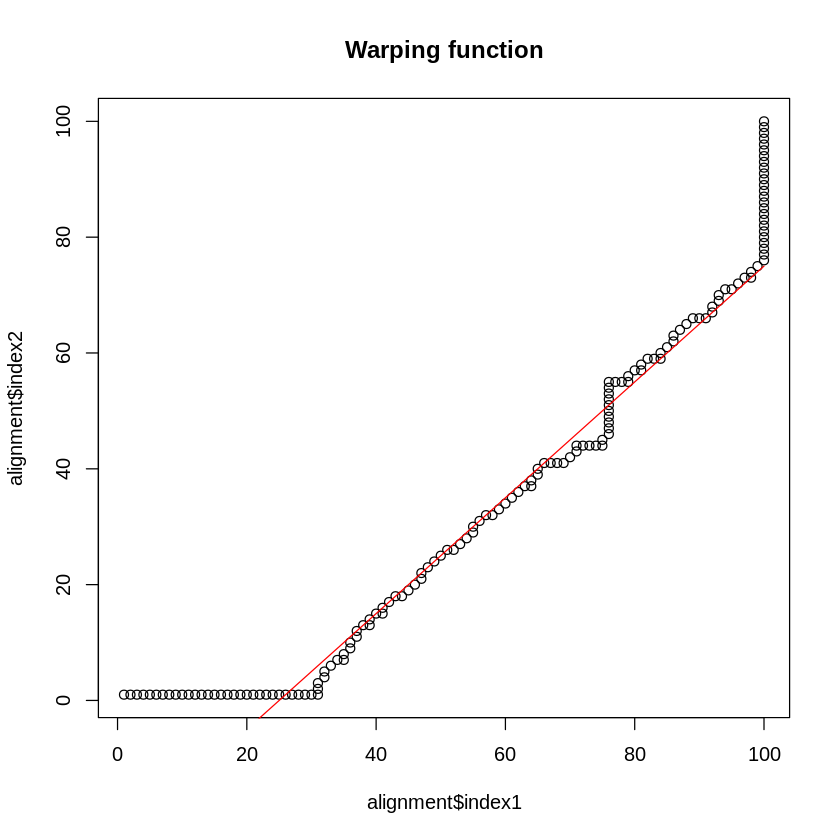


dtw> #########
dtw> ##
dtw> ## Subsetting allows warping and unwarping of
dtw> ## timeseries according to the warping curve. 
dtw> ## See first example below.
dtw> ##
dtw> 
dtw> ## Most useful: plot the warped query along with reference 
dtw> plot(reference)


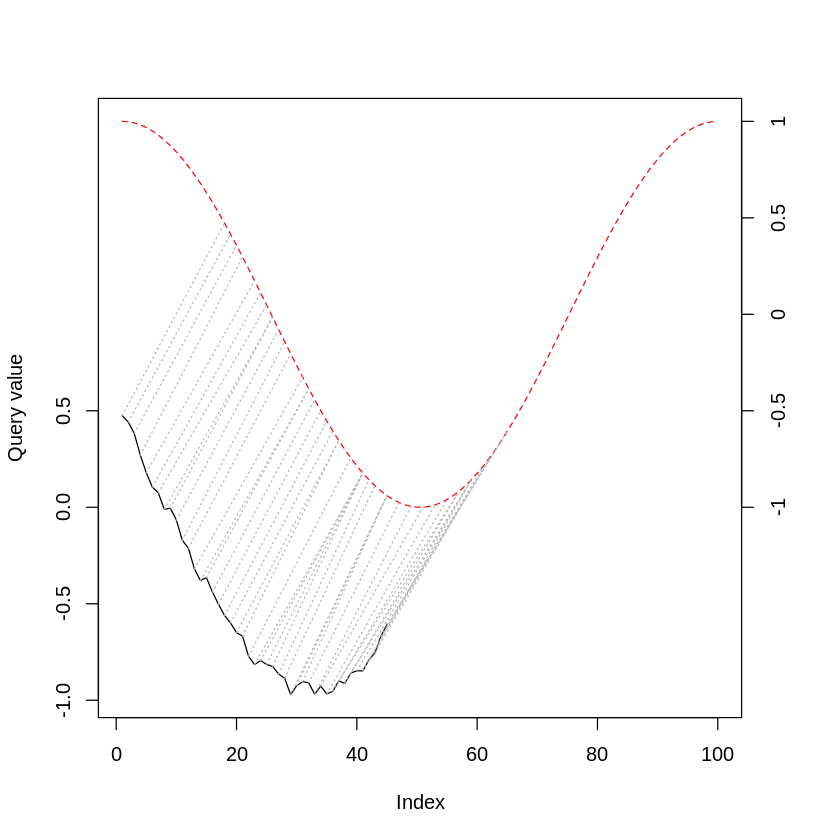


dtw> lines(query[alignment$index1]~alignment$index2,col="blue")

dtw> ## Plot the (unwarped) query and the inverse-warped reference
dtw> plot(query,type="l",col="blue")


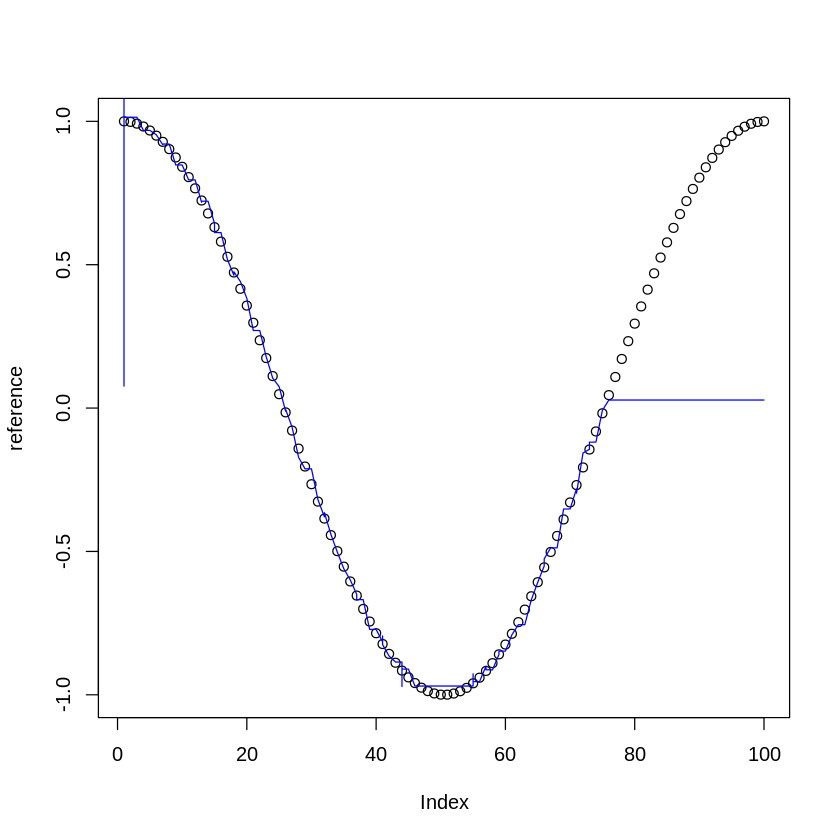


dtw> points(reference[alignment$index2]~alignment$index1)

dtw> #########
dtw> ##
dtw> ## Contour plots of the cumulative cost matrix
dtw> ##    similar to: plot(alignment,type="density") or
dtw> ##                dtwPlotDensity(alignment)
dtw> ## See more plots in ?plot.dtw 
dtw> ##
dtw> 
dtw> ## keep = TRUE so we can look into the cost matrix
dtw> 
dtw> alignment<-dtw(query,reference,keep=TRUE);

dtw> contour(alignment$costMatrix,col=terrain.colors(100),x=1:100,y=1:100,
dtw+ 	xlab="Query (noisy sine)",ylab="Reference (cosine)");


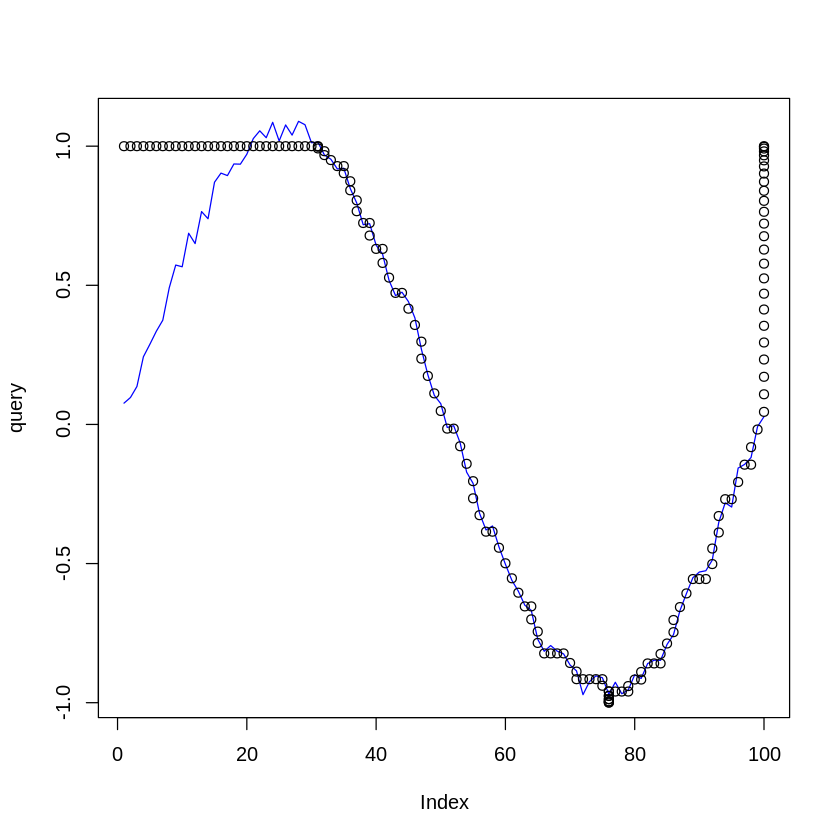


dtw> lines(alignment$index1,alignment$index2,col="red",lwd=2);

dtw> #########
dtw> ##
dtw> ## An hand-checkable example
dtw> ##
dtw> 
dtw> ldist<-matrix(1,nrow=6,ncol=6);  # Matrix of ones

dtw> ldist[2,]<-0; ldist[,5]<-0;      # Mark a clear path of zeroes

dtw> ldist[2,5]<-.01;		 # Forcely cut the corner

dtw> ds<-dtw(ldist);			 # DTW with user-supplied local

dtw>                                  #   cost matrix
dtw> da<-dtw(ldist,step=asymmetric);	 # Also compute the asymmetric 

dtw> plot(ds$index1,ds$index2,pch=3); # Symmetric: alignment follows


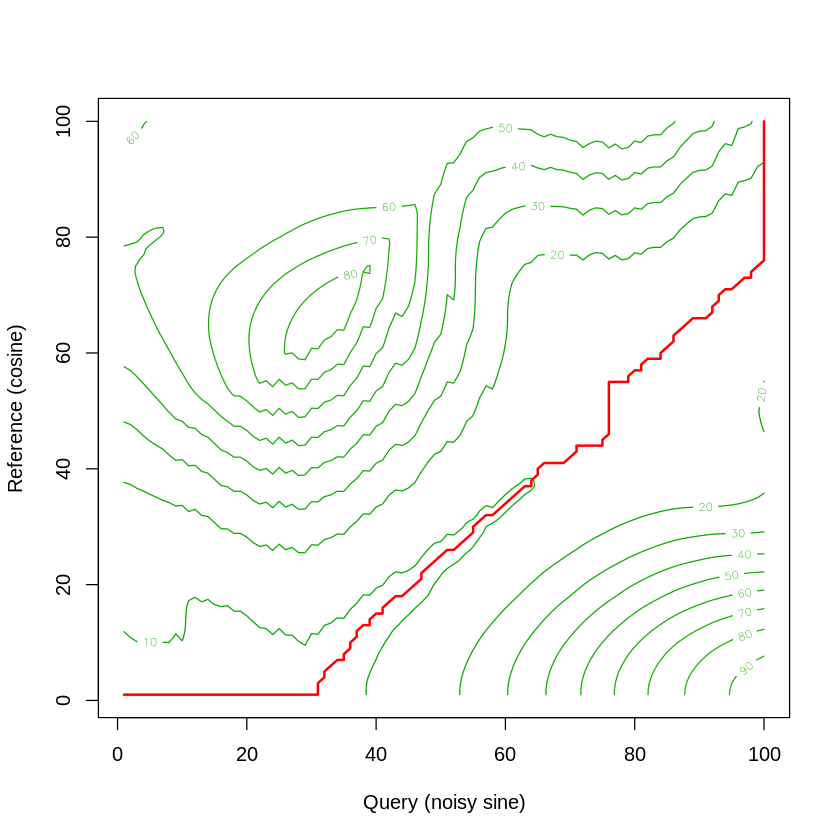


dtw>                                  #   the low-distance marked path
dtw> points(da$index1,da$index2,col="red");  # Asymmetric: visiting

dtw>                                         #   1 is required twice
dtw> 
dtw> ds$distance;
[1] 2

dtw> da$distance;
[1] 2


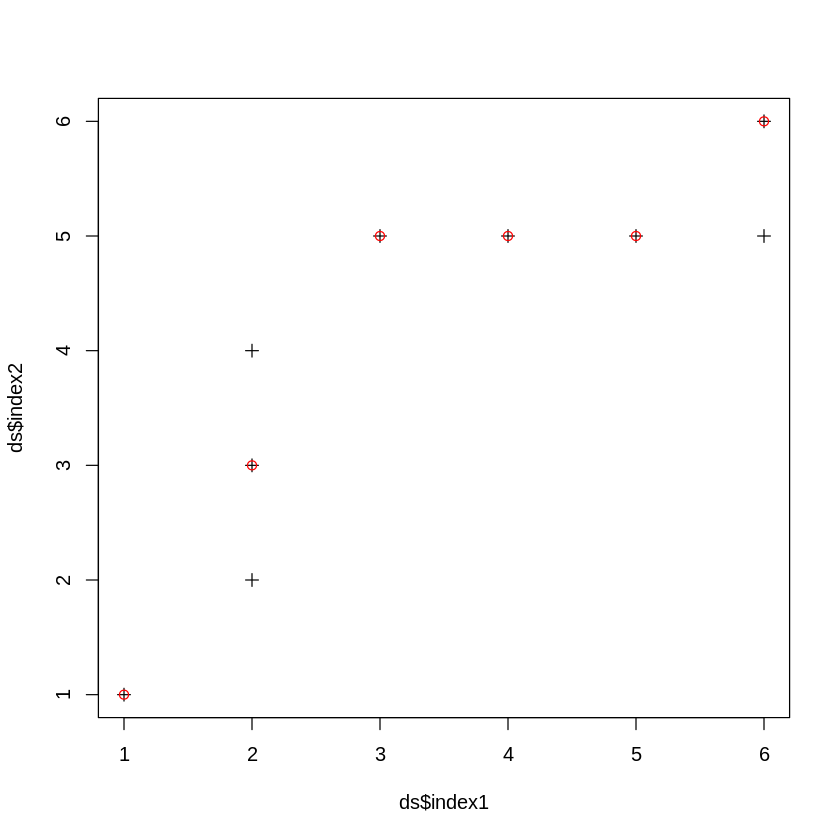

In [20]:
example(dtw)

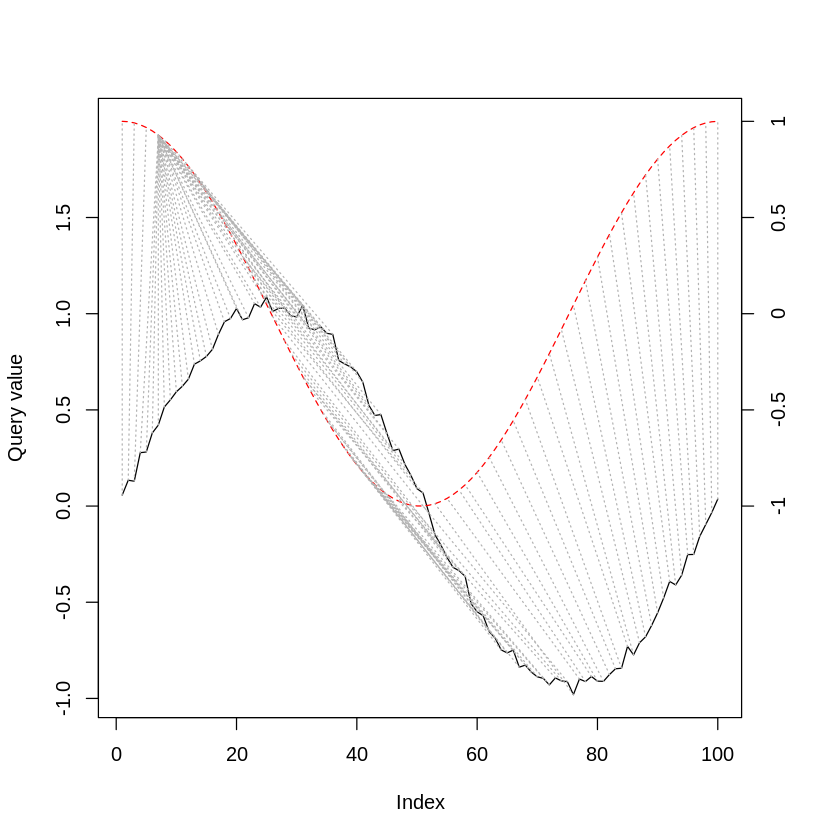

In [28]:
alignmentOBE <-
dtw(query,reference,
keep=TRUE,step=asymmetric)

plot(alignmentOBE,type="two",off=1);


In [ ]:
read.table